In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
import json
rouge=json.load(open('data/text_summarization_rouge_john.json'))

In [8]:
# nested dict to dataframe
def map_wp_str(wp_str):
    if "Delta" in wp_str:
        return "$\delta$"
    elif "Gamma" in wp_str:
        return "$\gamma$"
    elif "John" in wp_str:
        return "John"
    else:
        return wp_str
df = pd.DataFrame.from_dict(
    [{"wp": map_wp_str(wp_str), "score": score_str, "value": score} 
     for wp_str in rouge for score_str in rouge[wp_str] for score in rouge[wp_str][score_str]],
                            )
df.head()

,wp,score,value
0,John,rouge1,0.350515
1,John,rouge1,0.380952
2,John,rouge1,0.381818
3,John,rouge1,0.375000
4,John,rouge1,0.335484


<Axes: xlabel='wp', ylabel='value'>

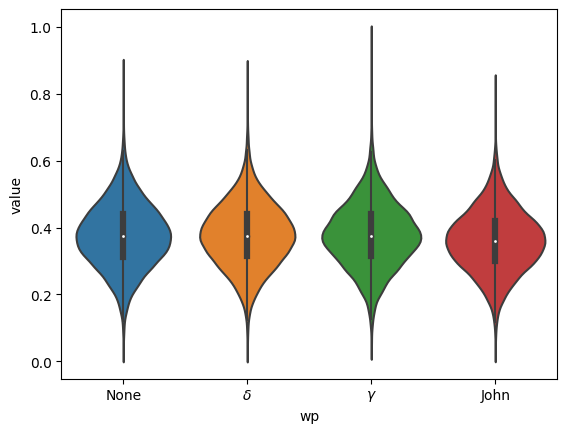

In [9]:
import seaborn as sns
sns.violinplot(data=df[df['score']=='rouge1'], x="wp", y="value",order=["None", "$\delta$", "$\gamma$","John"])